# DS Lab Activity 6.3. Network Analysis**


## **Learning Objectives**
By the end of this lab, students will:
1. **Load and preprocess** the dataset into a graph.
2. **Analyze network topology** (number of nodes, edges, density, degree distribution).
3. **Compute centrality measures** (Degree Centrality, Betweenness, Closeness, Eigenvector Centrality).
4. **Apply the PageRank algorithm** and interpret results.
5. **Identify ego-networks** for nodes with the highest centrality.
6. **Visualize key insights** using NetworkX and Matplotlib.

---

## **Dataset Overview**
The dataset (`colaboration.txt`) contains pairs of **collaborating entities (e.g., authors, researchers)**. Each row represents an **undirected edge** between two entities. Arxiv HEP-TH (High Energy Physics - Theory) collaboration network is from the e-print arXiv and covers scientific collaborations between authors papers submitted to High Energy Physics - Theory category. If an author $i$ co-authored a paper with author $j$, the graph contains a undirected edge from $i$ to $j$. If the paper is co-authored by $k$ authors this generates a completely connected (sub)graph on $k$ nodes. The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv, and thus represents essentially the complete history of its HEP-TH section.

## Summary of commands
The following table summarizes the **centrality measures** and their corresponding **NetworkX commands**, along with **interpretation and use cases**.

| **Centrality Measure**      | **NetworkX Command**                     | **Interpretation** | **Use Case** |
|-----------------------------|------------------------------------------|--------------------|--------------|
| **Degree Centrality**       | `nx.degree_centrality(G)`               | Measures how many direct connections a node has, relative to the total possible connections. | Identifies **popular nodes** in collaboration or social networks. |
| **Betweenness Centrality**  | `nx.betweenness_centrality(G)`          | Identifies nodes that act as bridges between different parts of the network. | Detects **key intermediaries** or **gatekeepers** in communication. |
| **Closeness Centrality**    | `nx.closeness_centrality(G)`            | Measures how quickly a node can reach all other nodes in the network. | Useful in **epidemic modeling** or **efficient information flow**. |
| **Eigenvector Centrality**  | `nx.eigenvector_centrality(G)`          | Assigns importance based on **connections to influential nodes**. | Identifies **influencers** in networks, similar to Google's **PageRank**. |
| **PageRank**                | `nx.pagerank(G, alpha=0.85)`            | A variant of eigenvector centrality that ranks nodes based on link importance. | Used in **search engine ranking** and **influence scoring**. |

### **Step 1: Load and Prepare the Dataset**

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "colaboration.txt"

# Read dataset and create edge list
edges = []
with open(file_path, "r") as file:
    for line in file:
        nodes = line.strip().split()
        if len(nodes) == 2:
            edges.append((int(nodes[0]), int(nodes[1])))

# Create an undirected graph
G = nx.Graph()
G.add_edges_from(edges)

# Display basic graph statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
print(f"Graph Loaded: {num_nodes} nodes, {num_edges} edges, Density: {density:.5f}")

Graph Loaded: 9877 nodes, 25998 edges, Density: 0.00053


### **Step 2: Analyze Network Topology**

Max Degree: 65, Min Degree: 1, Avg Degree: 5.26


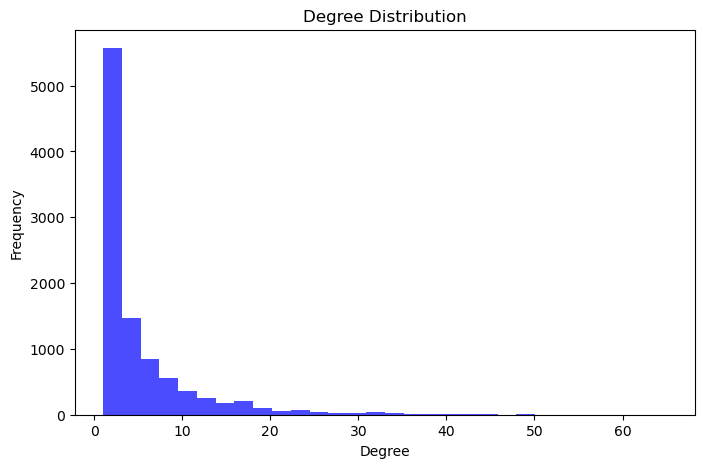

In [2]:
# Degree distribution
degree_sequence = [deg for _, deg in G.degree()]
max_degree = max(degree_sequence)
min_degree = min(degree_sequence)
avg_degree = sum(degree_sequence) / len(degree_sequence)

print(f"Max Degree: {max_degree}, Min Degree: {min_degree}, Avg Degree: {avg_degree:.2f}")

# Visualize degree distribution
plt.figure(figsize=(8, 5))
plt.hist(degree_sequence, bins=30, color='blue', alpha=0.7)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

### **Step 3: Compute Centrality Measures**

**Note.** The following code cells may take a longer time to run, be patient!

In [ ]:
# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Create DataFrame for comparison
centrality_df = pd.DataFrame({
    "Node": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values()),
    "Betweenness Centrality": list(betweenness_centrality.values()),
    "Closeness Centrality": list(closeness_centrality.values()),
    "Eigenvector Centrality": list(eigenvector_centrality.values())
})

# Sort by degree centrality
centrality_df = centrality_df.sort_values(by="Degree Centrality", ascending=False)
print("\nTop Nodes by Degree Centrality:")
print(centrality_df.head(10))

### **Step 4: Apply the PageRank Algorithm**

In [ ]:
# Compute PageRank
pagerank = nx.pagerank(G)

# Convert to DataFrame
pagerank_df = pd.DataFrame({"Node": list(pagerank.keys()), "PageRank": list(pagerank.values())})
pagerank_df = pagerank_df.sort_values(by="PageRank", ascending=False)

# Display top nodes
print("\nTop 10 Nodes by PageRank:")
print(pagerank_df.head(10))

### **Step 5: Find Ego-Networks of Top Central Nodes**

In [ ]:
# Find the most central node
top_node = centrality_df.iloc[0]["Node"]

# Extract ego-network
ego = nx.ego_graph(G, top_node)

# Plot ego-network
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(ego, seed=42)
nx.draw(ego, pos, with_labels=True, node_color='orange', edge_color='blue', node_size=400, font_size=7)
plt.title(f"Ego-Network of Node {top_node}")
plt.show()